# Analyzing the Redundancy Correlation Metric
## - Shane Bechtel

# Initial Setup

This section is needed in order to setup for the rest of the notebook. First, a UVData object is instantiated and filled with the datafiles that will be examined, observation 2458042.12552 and all its polarizations in this case. From there, the redundant baselines are necessary, and as such can be gathered using the hera_cal methods, and stored in the variable reds. With that, the work to analyze the redundancy correlation is ready to begin.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from pyuvdata import uvutils
from hera_qm import ant_metrics
import hera_cal

In [2]:

data_file_list = ['/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yy.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.xy.HH.uv']

uv = UVData()


In [3]:

uv.read_miriad(data_file_list)


Combined polarizations are not evenly spaced. This will make it impossible to write this data out to some file types.


In [4]:

aa = hera_cal.utils.get_aa_from_uv(uv)

info = hera_cal.omni.aa_to_info(aa)

reds = info.get_reds()


# Visualizing the Visibilities of Redundant Baselines

## Determine which frequency to use

Since only two frequencies are actually used to generate the redundancy correlation, namely the two whose average is used as the median after averaging over time, examining the visibility data for one of those frequencies should give us a good representation of data which should be correlated. In order to find this frequency, the actual value that comes from taking the median of the time-averaged data is compared to each value of that data in order to see which is closest, as that value is one of the two used to generate the median. From there, the specific index of that value will be used to determine which frequency index the original visibility data should be gathered from, and subsequently plotted.

In [5]:

#Long Vertical Baselines (84 meters)

data0 = uv.get_data(1,85,'xx')

data1 = uv.get_data(2,86,'xx')

#Short Vertical Baselines (28 meters)

data2 = uv.get_data(11,37,'xx')

data3 = uv.get_data(12,38,'xx')

#Long Horizontal Baselines (84 meters)

data4 = uv.get_data(82,88,'xx')

data5 = uv.get_data(65,71,'xx')

#Short Horizontal Baselines (28 meters)

data6 = uv.get_data(0,2,'xx')

data7 = uv.get_data(11,13,'xx')

#Perform the steps for calculating the redundancy up until you take the median

test1 = np.abs(np.mean(data0 * data1.conj(),axis = 0))
test2 = np.abs(np.mean(data2 * data3.conj(),axis = 0))
test3 = np.abs(np.mean(data4 * data5.conj(),axis = 0))
test4 = np.abs(np.mean(data6 * data7.conj(),axis = 0))


In [6]:

autoPower = ant_metrics.compute_median_auto_power_dict(uv, ['xx','xy','yx','yy'], reds)

#Calculate the median seperately and store it in corr

corr1 = np.median(test1)
corr2 = np.median(test2)
corr3 = np.median(test3)
corr4 = np.median(test4)

#Normalize the correlation in order to have a sense for what the actual metric would calculate
#It will not be used further

full_corr1 = corr1/np.sqrt(autoPower[1,85,'xx']*autoPower[2,86,'xx'])
full_corr2 = corr2/np.sqrt(autoPower[11,37,'xx']*autoPower[12,38,'xx'])
full_corr3 = corr3/np.sqrt(autoPower[82,88,'xx']*autoPower[65,71,'xx'])
full_corr4 = corr4/np.sqrt(autoPower[0,2,'xx']*autoPower[11,13,'xx'])

print full_corr1
print full_corr2
print full_corr3
print full_corr4


0.799411906462
0.993528433698
0.953971988725
0.979050089681


In [7]:

min_diff1 = 1000
min_diff2 = 1000
min_diff3 = 1000
min_diff4 = 1000

min_diff_ind1_1 = 0
min_diff_ind1_2 = 0
min_diff_ind1_3 = 0
min_diff_ind1_4 = 0

#Find the one of the frequencies used to calculate the median 
#There are an even amount so an average is taken of the two closest frequencies values in the metric
#Since the two frequencies are extremely related after a time average, this should still be representative


for i in range(len(test1)):
    
    if (np.abs(test1[i]-corr1) < min_diff1):
        
        min_diff1 = np.abs(test1[i]-corr1)
        
        min_diff_ind1_1 = i
        
    if (np.abs(test2[i]-corr1) < min_diff2):
        
        min_diff2 = np.abs(test2[i]-corr2)
        
        min_diff_ind1_2 = i
    
    if (np.abs(test3[i]-corr3) < min_diff3):
        
        min_diff3 = np.abs(test3[i]-corr3)
        
        min_diff_ind1_3 = i
    
    if (np.abs(test4[i]-corr4) < min_diff4):
        
        min_diff4 = np.abs(test4[i]-corr4)
        
        min_diff_ind1_4 = i


In [9]:

#Store the visibility data for both of the baselines for the first corr value.

data0_ind = uv.antpair2ind(1,85)
data1_ind = uv.antpair2ind(2,86)

freq1_data0 = uv.data_array[data0_ind,0,min_diff_ind1_1,0]
freq1_data1 = uv.data_array[data1_ind,0,min_diff_ind1_1,0]


In [10]:

#Store the visibility data for both of the baselines for the second corr value.

data2_ind = uv.antpair2ind(1,25)
data3_ind = uv.antpair2ind(2,26)

freq1_data2 = uv.data_array[data2_ind,0,min_diff_ind1_2,0]
freq1_data3 = uv.data_array[data3_ind,0,min_diff_ind1_2,0]


In [11]:

#Store the visibility data for both of the baselines for the third corr value.

data4_ind = uv.antpair2ind(82,88)
data5_ind = uv.antpair2ind(65,71)

freq1_data4 = uv.data_array[data4_ind,0,min_diff_ind1_3,0]
freq1_data5 = uv.data_array[data5_ind,0,min_diff_ind1_3,0]


In [12]:

#Store the visibility data for both of the baselines for the fourth corr value.

data6_ind = uv.antpair2ind(0,2)
data7_ind = uv.antpair2ind(11,13)

freq1_data6 = uv.data_array[data6_ind,0,min_diff_ind1_4,0]
freq1_data7 = uv.data_array[data7_ind,0,min_diff_ind1_4,0]


## Plotting the Visibilities

The visibilities for both baselines at the specific frequency are plotted on a complex plane primarily in order to see how they relate to one another. In the plots seen below, the North-South baselines appear to have very little correlation between them, whereas the East-West baselines are potentially correlated, though it is not certain from these plots. 

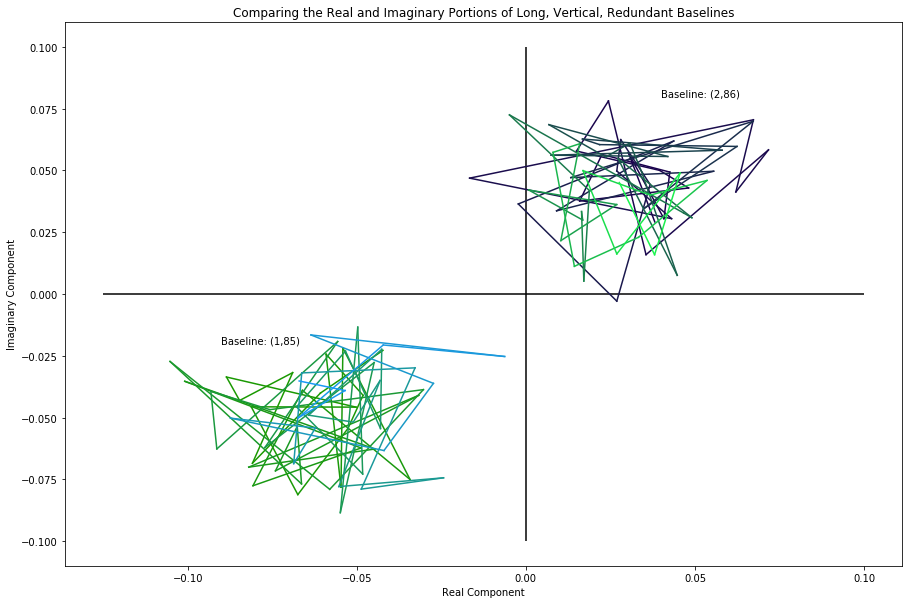

In [13]:

#Plot the visibilities for the two baselines on a complex plane

fig = plt.figure(figsize = (15,10))

complex_0 = np.zeros((60,2))
complex_1 = np.zeros((60,2))

for i in range(len(freq1_data0)):
    
    complex_0[i,0] = freq1_data0[i].real
    complex_0[i,1] = freq1_data0[i].imag
    
    complex_1[i,0] = freq1_data1[i].real
    complex_1[i,1] = freq1_data1[i].imag

#In order to show clearer development over time, the color of each line is varied of time

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.vlines(0,-.1,.1)
plt.hlines(0,-0.125,0.1)

plt.annotate('Baseline: (1,85)', (-0.09,-0.02))
plt.annotate('Baseline: (2,86)', (0.04,0.08))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_0[i:i+s+1,0],complex_0[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_1[i:i+s+1,0],complex_1[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Long, Vertical, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


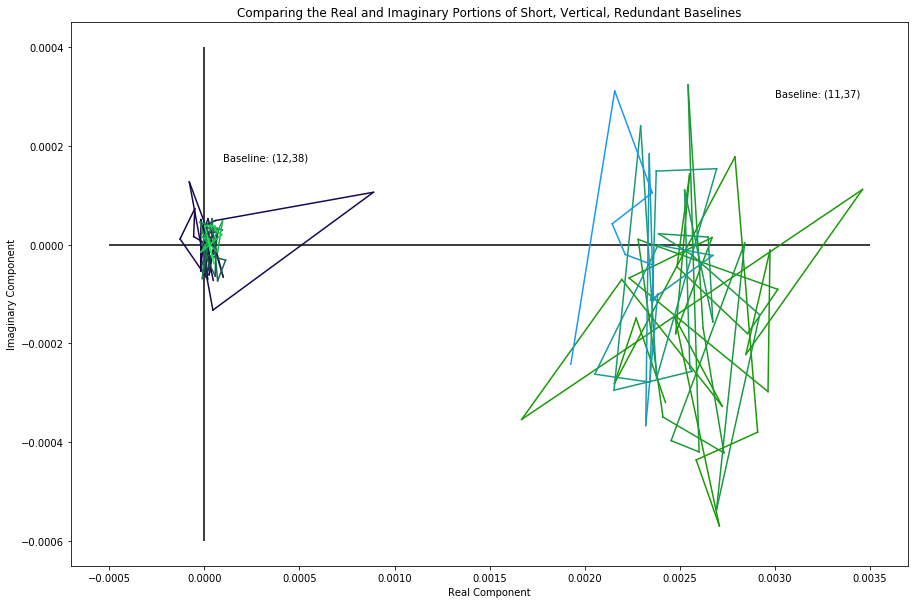

In [14]:

#Plot the visibilities for the two baselines on a complex plane

fig = plt.figure(figsize = (15,10))

complex_2 = np.zeros((60,2))
complex_3 = np.zeros((60,2))

for i in range(len(freq1_data0)):
    
    complex_2[i,0] = freq1_data2[i].real
    complex_2[i,1] = freq1_data2[i].imag
    
    complex_3[i,0] = freq1_data3[i].real
    complex_3[i,1] = freq1_data3[i].imag
    
#In order to show clearer development over time, the color of each line is varied of time

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.hlines(0,-0.0005,0.0035)
plt.vlines(0,-0.0006,0.0004)

plt.annotate('Baseline: (11,37)',(0.003,0.0003))
plt.annotate('Baseline: (12,38)',(0.0001,0.00017))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_2[i:i+s+1,0],complex_2[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_3[i:i+s+1,0],complex_3[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Short, Vertical, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


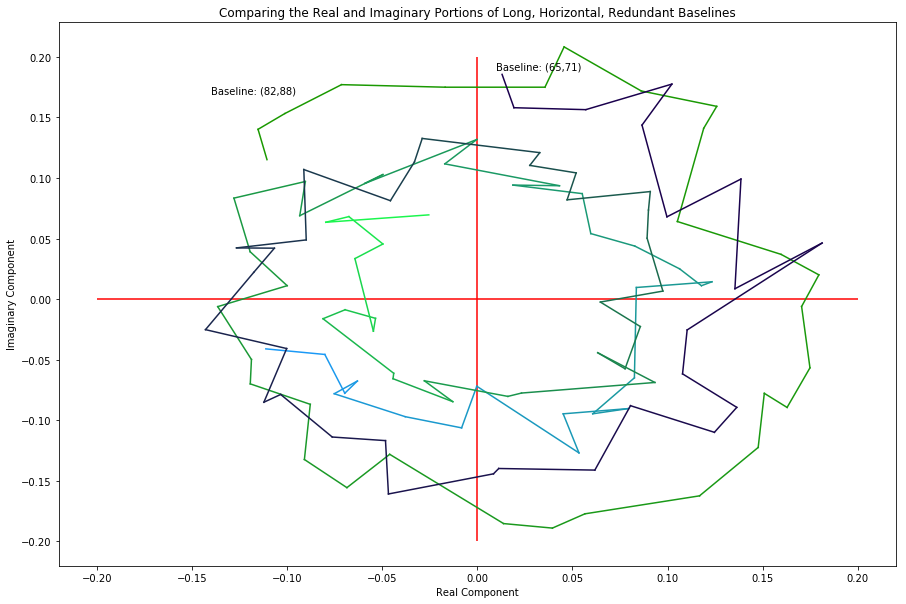

In [16]:

#Plot the visibilities for the two baselines on a complex plane

fig = plt.figure(figsize = (15,10))

complex_4 = np.zeros((60,2))
complex_5 = np.zeros((60,2))

plt.vlines(0,-.2,.2,'r')
plt.hlines(0,-.2,.2,'r')

plt.annotate('Baseline: (82,88)', (-.14,.17))
plt.annotate('Baseline: (65,71)', (0.01,.19))

for i in range(len(freq1_data4)):
    
    complex_4[i,0] = freq1_data4[i].real
    complex_4[i,1] = freq1_data4[i].imag
    
    complex_5[i,0] = freq1_data5[i].real
    complex_5[i,1] = freq1_data5[i].imag
    
#In order to show clearer development over time, the color of each line is varied of time

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_4[i:i+s+1,0],complex_4[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_5[i:i+s+1,0],complex_5[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Long, Horizontal, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


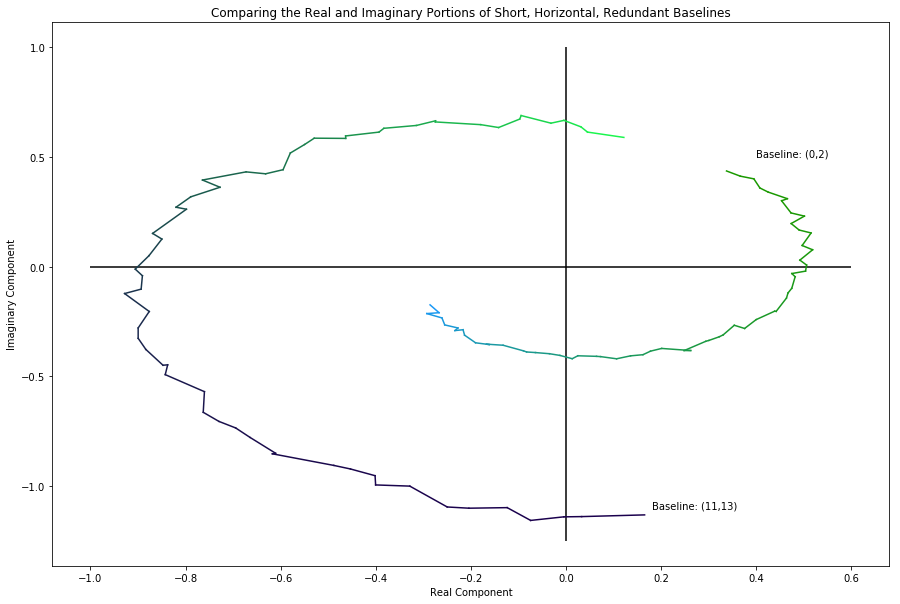

In [17]:

#Plot the visibilities for the two baselines on a complex plane

fig = plt.figure(figsize = (15,10))

complex_6 = np.zeros((60,2))
complex_7 = np.zeros((60,2))

for i in range(len(freq1_data4)):
    
    complex_6[i,0] = freq1_data6[i].real
    complex_6[i,1] = freq1_data6[i].imag
    
    complex_7[i,0] = freq1_data7[i].real
    complex_7[i,1] = freq1_data7[i].imag
    
#In order to show clearer development over time, the color of each line is varied of time

T=np.linspace(0,1,60)**2

ax = fig.add_subplot(111)

plt.vlines(0,-1.25,1)
plt.hlines(0,-1,0.6)

plt.annotate('Baseline: (0,2)',(0.4,0.5))
plt.annotate('Baseline: (11,13)',(0.18,-1.1))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_6[i:i+s+1,0],complex_6[i:i+s+1,1],color=(0.1,0.6,T[i]))

s = 1 # Segment length
for i in range(0,60-s,s):
    ax.plot(complex_7[i:i+s+1,0],complex_7[i:i+s+1,1],color=(0.1,T[i],0.3))
    
plt.title('Comparing the Real and Imaginary Portions of Short, Horizontal, Redundant Baselines')
plt.ylabel('Imaginary Component')
plt.xlabel('Real Component')
plt.show()


## Plotting the Phases/Phase Differences

In order to better determine whether the baselines are correlated to one another, the phases of each baselines' visibility are plotted below. One can see that the first two, corresponding to the North-South baselines, appear to have no distinct correlation, while the final two, corresponding to the East-West baselines, both show larges signs of correlation between the two. 

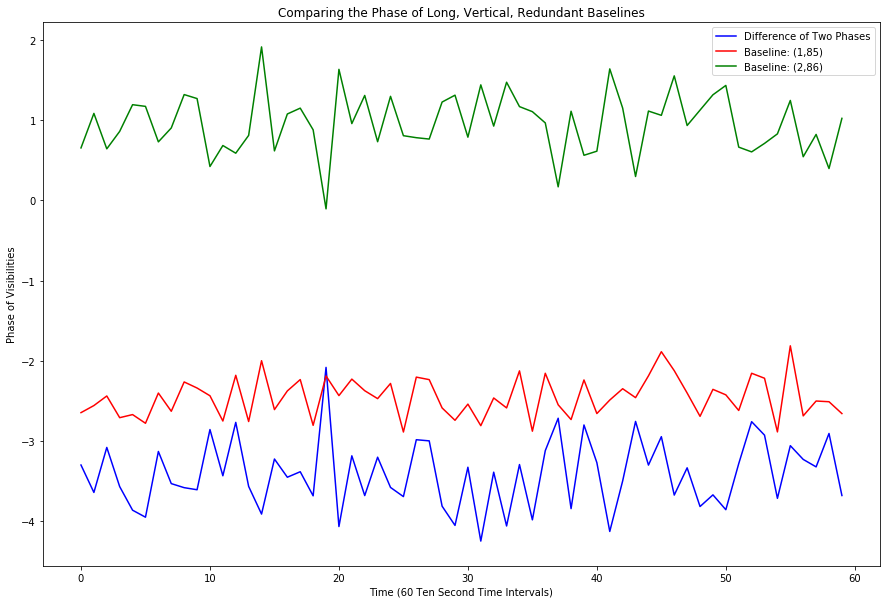

In [18]:

#Compare the phases of the two baselines

phase_fig1 = np.angle(freq1_data0) - np.angle(freq1_data1)

plt.figure(figsize = (15,10))

plt.plot(range(60),phase_fig1,'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.angle(freq1_data0),'r', label = 'Baseline: (1,85)')
plt.plot(range(60),np.angle(freq1_data1),'g',label = 'Baseline: (2,86)')

plt.title('Comparing the Phase of Long, Vertical, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


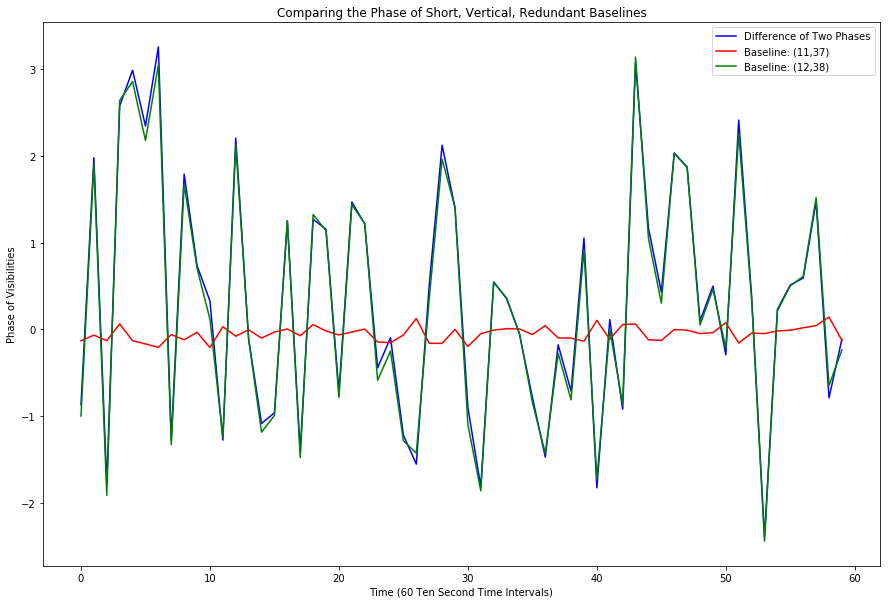

In [19]:

#Compare the phases of the two baselines

phase_fig2 = -np.angle(freq1_data2) + np.angle(freq1_data3)

plt.figure(figsize = (15,10))

plt.plot(range(60),phase_fig2,'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.angle(freq1_data2),'r',label = 'Baseline: (11,37)')
plt.plot(range(60),np.angle(freq1_data3),'g', label = 'Baseline: (12,38)')

plt.title('Comparing the Phase of Short, Vertical, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


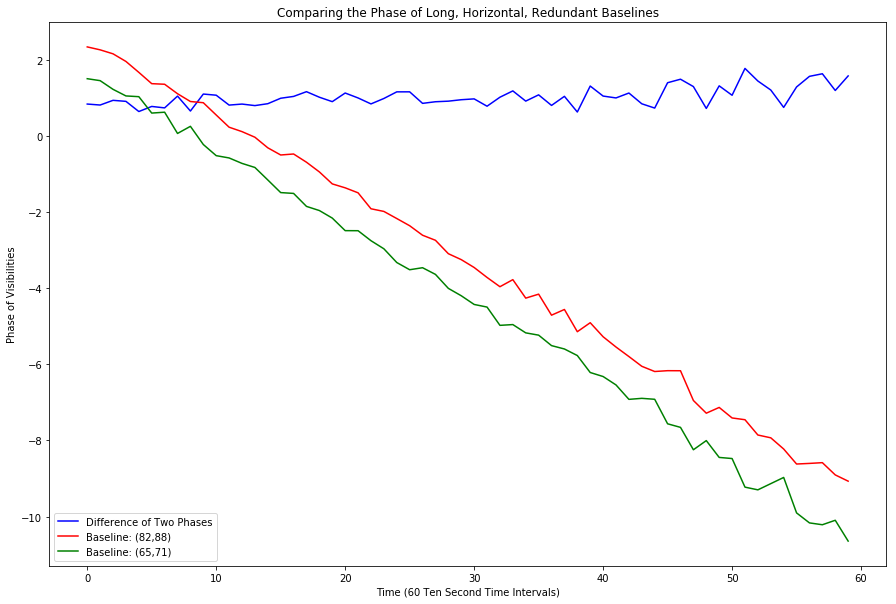

In [20]:

#Compare the phases of the two baselines

phase_fig3 = np.angle(freq1_data4) - np.angle(freq1_data5)

plt.figure(figsize = (15,10))

plt.plot(range(60),np.unwrap(phase_fig3),'b',label = 'Difference of Two Phases')
plt.plot(range(60),np.unwrap(np.angle(freq1_data4)),'r',label = 'Baseline: (82,88)')
plt.plot(range(60),np.unwrap(np.angle(freq1_data5)),'g', label = 'Baseline: (65,71)')

plt.title('Comparing the Phase of Long, Horizontal, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


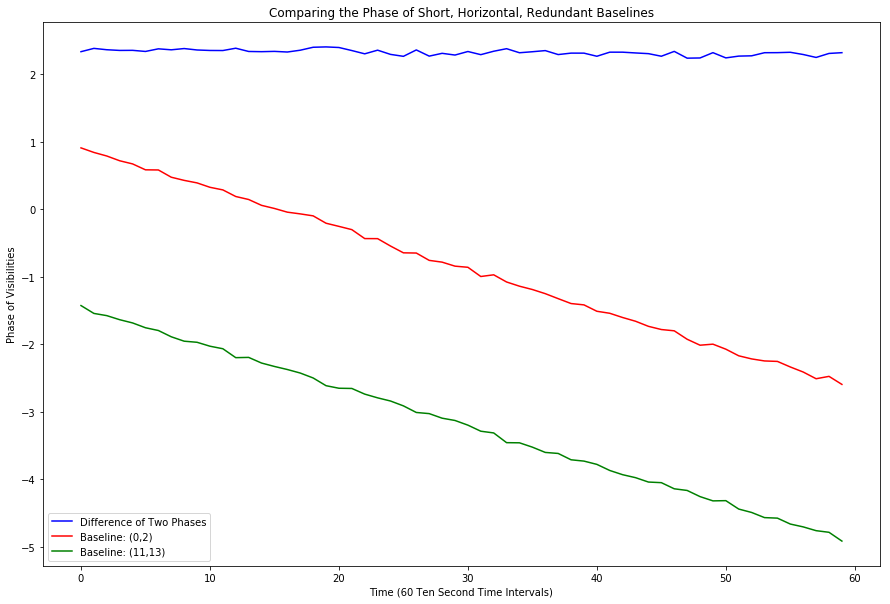

In [21]:

#Compare the phases of the two baselines

phase_fig4 = np.angle(freq1_data6) - np.angle(freq1_data7)

plt.figure(figsize = (15,10))

plt.plot(range(60),np.unwrap(phase_fig4),'b', label = 'Difference of Two Phases')
plt.plot(range(60),np.unwrap(np.angle(freq1_data6)),'r', label = 'Baseline: (0,2)')
plt.plot(range(60),np.unwrap(np.angle(freq1_data7)),'g',label = 'Baseline: (11,13)')

plt.title('Comparing the Phase of Short, Horizontal, Redundant Baselines')
plt.ylabel('Phase of Visibilities')
plt.xlabel('Time (60 Ten Second Time Intervals)')
plt.legend()
plt.show()


# Examining the Redundancy of an Antenna based on Position

## Generate a Method to Find the Redundancy Correlation for a Specific Baseline

From the above findings, it becomes apparent that the direction and distance of a baseline may play a key role in understanding the redundancy correlation. To that end, a way of determining the effect of position is needed. This requires a function which can take a single baseline and return the relative redundancy correlation, derived using the same methods as those in red_corr_metrics, against its redundant baselines. It should be noted that this function is hardcoded to return values for a 'xx' polarization as this view of the data should suffice to show us any present effects.

In [54]:

#Obtain the position, and indices, of each antenna

antpos, ants = uv.get_ENU_antpos()


In [39]:

#Create a function which will return the redundancy correlation for a specific baseline

def red_corr_func(ant0,ant1):
    
    if (ant0 == ant1): #Return 0 for any autocorrelations
        
        return 0
    
    if (ant0 <= ant1): #Order the two given antenna such that the lesser number is the first antenna in the baseline tuple
        
        base = (ant0,ant1)
    
    elif(ant0 > ant1):
        
        base = (ant1,ant0)
    
    #Instantiate the following index values with the first being 100, a number larger than the max index of 93
    ind1 = 100
    ind2 = 0
    
    for i in range(len(reds)): #Determine whether the baseline is redundant or not, then mark its position
        
        for j in range(len(reds[i])):
            
            if (reds[i][j] == base): 
                
                ind1 = i
                ind2 = j
                
    if (ind1 == 100): #If the baseline was never found, it is non-redundant so return 0
        
        return 0
    
    else: #Calculate the average redundancy correlation in the redundancy group
        
        avg = 0
        
        count = 0
        
        for k in range(len(reds[ind1])): #Loop through all of the redundant baselines of the redundancy group
            
            if (k == ind2): #If k == ind2, then this is the input baseline, thus don't add to the avg or increase the count
                
                avg += 0
                
            else:
                
                #Determine the antenna in the baseline currently being compared
                antenna1 = reds[ind1][k][0]
                antenna2 = reds[ind1][k][1]
                
                #Using the methods seen in red_corr_metric, find the correlation value of the two baselines
                
                correlation = np.median(np.abs(np.mean(uv.get_data(base[0],base[1],'xx') * uv.get_data(antenna1,antenna2,'xx'),axis = 0)))
                
                #Add this value to the avg value
                
                avg += correlation/np.sqrt(autoPower[base[0],base[1],'xx']*autoPower[antenna1,antenna2,'xx'])
                
                count += 1 #Increment the count by 1
                
        avg = avg / count #Find the true value of the avg by dividing the total sum by the count
        
        return avg
   

## Using red_corr_func Generate Data for Various Antenna 

In order to observe the position's affect on the redundancy correlation, this function must be applied in such a way that one antenna is the focus of the plot and the baseline it creates with all other antenna will be represented by that antenna. In order to accomplish this, the antenna are looped through the same order in which their positions are ordered so that the returned value will be able to be easily applied to the correct antenna. A good number of chosen antenna should be used such that a good representation of the effect of position on the redundancy correlation can be observed.

In [40]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_0 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_0[i] = red_corr_func(0,ants[i])


In [41]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_1 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_1[i] = red_corr_func(1,ants[i])



In [42]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_41 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_41[i] = red_corr_func(41,ants[i])


In [43]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_53 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_53[i] = red_corr_func(53,ants[i])



In [44]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_65 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_65[i] = red_corr_func(65,ants[i])



In [45]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_82 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_82[i] = red_corr_func(82,ants[i])

 

In [46]:

#Generate the array of redundancy correlations involving the given antenna

red_corr_storage_143 = np.zeros(ants.size)

for i in range(len(ants)):
    
    red_corr_storage_143[i] = red_corr_func(143,ants[i])



## Plotting the Effect of Position on Redundancy Correlation

Finally, the effect of the position can be fully plotted in such a way that is easy to interpret. From examining the below plots, it becomes immediately apparent that the North-South baselines return much larger redundancy correlations than do those baselines running East-West. Using the knowledge that these East-West baselines experience much more evolution with respect to time and the fact that they appeared to be more correlated in the above plots, this result appears to introduce some uncertainty as to whether or not the Redundancy Correlation Metric is truly measuring what we believe it is. 

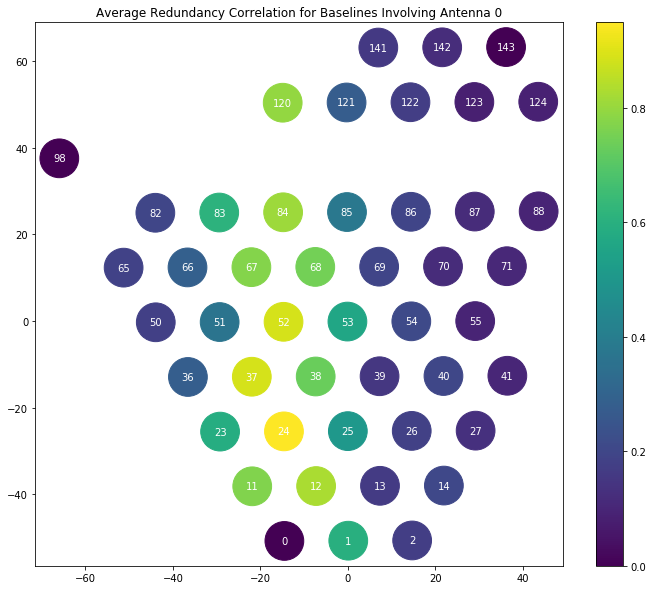

In [47]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_0,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 0')
plt.colorbar()
plt.show()


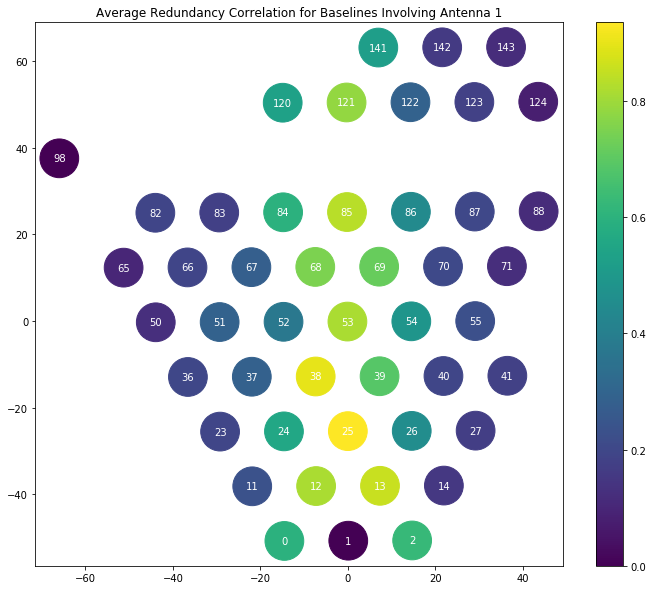

In [48]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_1,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 1')
plt.colorbar()
plt.show()


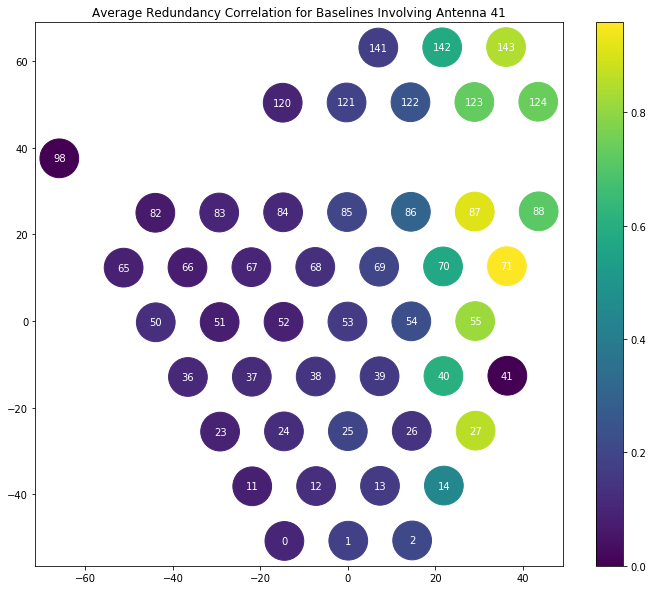

In [49]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_41,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 41')
plt.colorbar()
plt.show()


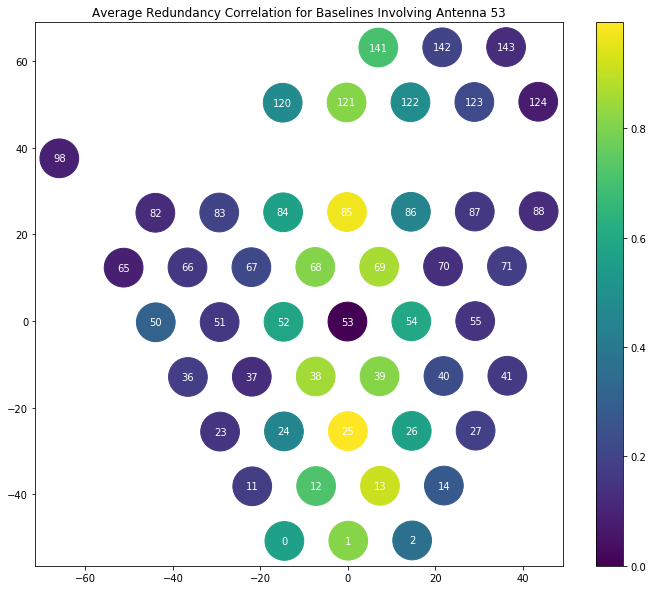

In [50]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_53,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 53')
plt.colorbar()
plt.show()


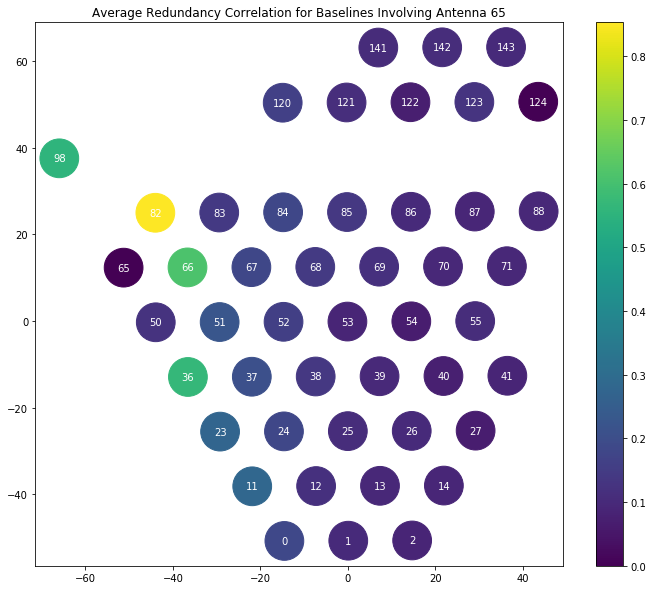

In [51]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_65,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 65')
plt.colorbar()
plt.show()


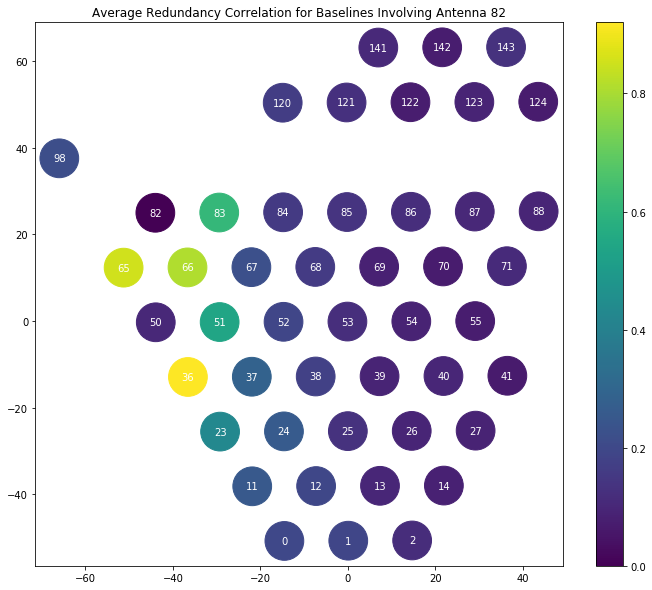

In [52]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_82,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 82')
plt.colorbar()
plt.show()


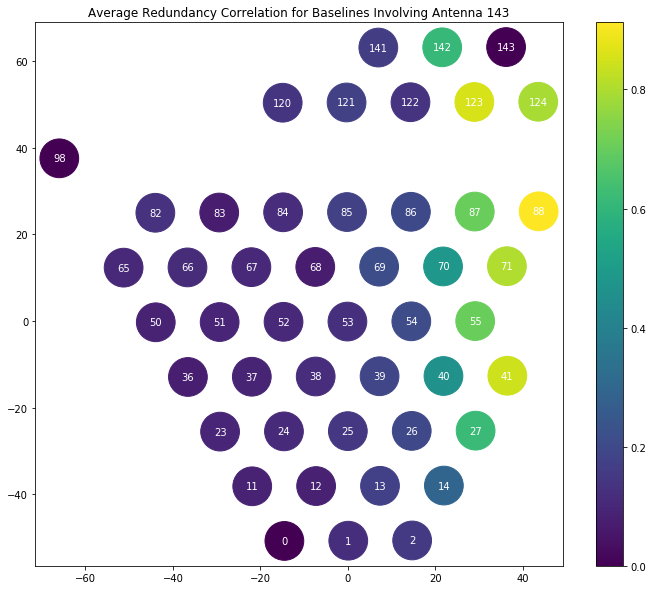

In [53]:

#Plot the antenna in their positions with their color given by the respective redundancy values

plt.figure(figsize=(26,10))
plt.subplot(121)
plt.scatter(antpos[:,0],antpos[:,1],c =red_corr_storage_143,marker='.',s=6000)

for aa,ant in enumerate(ants):
    
    #Add the number of each antenna to its corresponding plot point
    plt.text(antpos[aa,0],antpos[aa,1],ants[aa],color='w',va='center',ha='center')

plt.title('Average Redundancy Correlation for Baselines Involving Antenna 143')
plt.colorbar()
plt.show()
